<a href="https://colab.research.google.com/github/whynotkush/SMAI/blob/main/Autoencoder_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> <center> Autoencoder for MNIST Dataset

In [ ]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow
from matplotlib import pyplot

In [ ]:
# define dataset
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# scale data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train = X_train.reshape(60000,784)

In [ ]:
X_test = X_test.reshape(10000,784)

In [ ]:
X_train.shape , X_test.shape

((60000, 784), (10000, 784))

In [ ]:
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

In [ ]:
y_train.shape , y_test.shape

((60000, 1), (10000, 1))

Plotting sample image

In [ ]:
from matplotlib import pyplot as plt
def plot_sample(X, y, index):
    plt.figure(figsize = (15,4))
    plt.imshow(X[index])
    plt.axis('off')
    plt.title('label : '+str(y[index][0]))

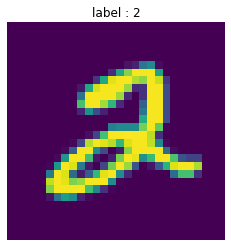

In [ ]:
plot_sample(X_train.reshape(60000,28,28) , y_train , 5)

### Adam optimizer

In [ ]:
def auto_encoder() :
  n_inputs = 784

  # define encoder
  visible = Input(shape=(n_inputs,))

  # encoder level 
  e = Dense(n_inputs)(visible)
  e = BatchNormalization()(e)
  e = LeakyReLU()(e)

  # bottleneck
  n_bottleneck = round(float(n_inputs) / 2.0)
  bottleneck = Dense(n_bottleneck)(e)


  # decoder level 
  d = Dense(n_inputs)(bottleneck)
  d = BatchNormalization()(d)
  d = LeakyReLU()(d)

  # output layer
  output = Dense(n_inputs, activation='linear')(d)

  # define autoencoder model
  model = Model(inputs=visible, outputs=output)

  # compile autoencoder model
  model.compile(optimizer= 'adam' , loss='mse')

  return model

In [ ]:
model = auto_encoder()

In [ ]:
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=10, batch_size=16, verbose=2, validation_data=(X_test, X_test))

Epoch 1/10
3750/3750 - 47s - loss: 0.0204 - val_loss: 0.0091
Epoch 2/10
3750/3750 - 46s - loss: 0.0115 - val_loss: 0.0069
Epoch 3/10
3750/3750 - 46s - loss: 0.0096 - val_loss: 0.0050
Epoch 4/10
3750/3750 - 47s - loss: 0.0085 - val_loss: 0.0043
Epoch 5/10
3750/3750 - 47s - loss: 0.0078 - val_loss: 0.0041
Epoch 6/10
3750/3750 - 47s - loss: 0.0074 - val_loss: 0.0039
Epoch 7/10
3750/3750 - 47s - loss: 0.0070 - val_loss: 0.0035
Epoch 8/10
3750/3750 - 47s - loss: 0.0068 - val_loss: 0.0035
Epoch 9/10
3750/3750 - 47s - loss: 0.0066 - val_loss: 0.0033
Epoch 10/10
3750/3750 - 47s - loss: 0.0064 - val_loss: 0.0033


In [ ]:
import numpy as np
validation_loss = history.history['val_loss']
loss_= np.mean(np.array(validation_loss))
print("Average validation loss : ",loss_)

Average validation loss :  0.004688636539503932


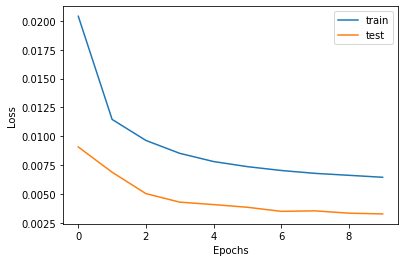

In [ ]:
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.show()

In [ ]:
pred_x1 = model.predict(X_test)
pred_x1.shape

(10000, 784)

In [ ]:
pred_x1 = pred_x1.reshape(10000,28,28)

Reshape images back to 28,28

(-0.5, 27.5, 27.5, -0.5)

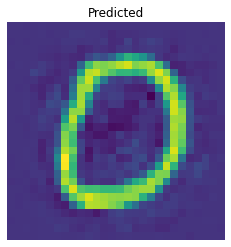

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(pred_x1[10])
plt.title('Predicted')
plt.grid(False)
plt.axis('off')

(-0.5, 27.5, 27.5, -0.5)

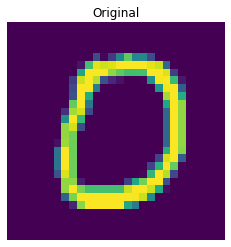

In [ ]:
plt.figure()
plt.imshow(X_test[10].reshape(28,28))
plt.title('Original')
plt.grid(False)
plt.axis('off')

### SGD Optmizer without Momentum

In [ ]:
def auto_encoder(opt_) :
  n_inputs = 784

  # define encoder
  visible = Input(shape=(n_inputs,))

  # encoder level 
  e = Dense(n_inputs)(visible)
  e = BatchNormalization()(e)
  e = LeakyReLU()(e)

  # bottleneck
  n_bottleneck = round(float(n_inputs) / 2.0)
  bottleneck = Dense(n_bottleneck)(e)

  # decoder level 
  d = Dense(n_inputs)(bottleneck)
  d = BatchNormalization()(d)
  d = LeakyReLU()(d)

  # output layer
  output = Dense(n_inputs, activation='linear')(d)

  # define autoencoder model
  model = Model(inputs=visible, outputs=output)

  # compile autoencoder model
  model.compile(optimizer= opt_ , loss='mse')

  return model

In [ ]:
opt_ = tensorflow.keras.optimizers.SGD(learning_rate = 0.1 , momentum = 0.0)

In [ ]:
model_sgd = auto_encoder(opt_)

In [ ]:
history = model_sgd.fit(X_train, X_train, epochs=10, batch_size=16, verbose=2, validation_data=(X_test, X_test))

Epoch 1/10
3750/3750 - 48s - loss: 0.0593 - val_loss: 0.0311
Epoch 2/10
3750/3750 - 48s - loss: 0.0337 - val_loss: 0.0245
Epoch 3/10
Epoch 4/10
3750/3750 - 48s - loss: 0.0265 - val_loss: 0.0188
Epoch 5/10
3750/3750 - 47s - loss: 0.0246 - val_loss: 0.0171
Epoch 6/10
3750/3750 - 47s - loss: 0.0232 - val_loss: 0.0159
Epoch 7/10
3750/3750 - 48s - loss: 0.0220 - val_loss: 0.0149
Epoch 8/10
3750/3750 - 49s - loss: 0.0211 - val_loss: 0.0140
Epoch 9/10
3750/3750 - 49s - loss: 0.0204 - val_loss: 0.0133
Epoch 10/10
3750/3750 - 48s - loss: 0.0197 - val_loss: 0.0127


In [ ]:
import numpy as np
validation_loss = history.history['val_loss']
loss_= np.mean(np.array(validation_loss))
print("Average validation loss : ",loss_)

Average validation loss :  0.018332327902317046


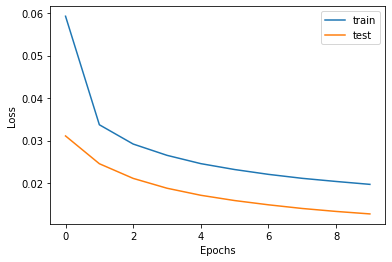

In [ ]:
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.show()

In [ ]:
pred_x1 = model_sgd.predict(X_test)
pred_x1.shape

(10000, 784)

Reshape images back to 28,28

In [ ]:
pred_x1 = pred_x1.reshape(10000,28,28)

(-0.5, 27.5, 27.5, -0.5)

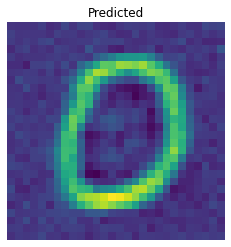

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(pred_x1[10])
plt.title('Predicted')
plt.grid(False)
plt.axis('off')

(-0.5, 27.5, 27.5, -0.5)

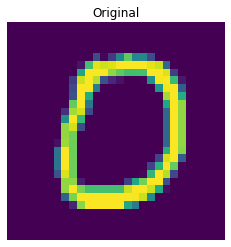

In [ ]:
plt.figure()
plt.imshow(X_test[10].reshape(28,28))
plt.title('Original')
plt.grid(False)
plt.axis('off')

### SGD Optmizer with Momentum

In [ ]:
opt_1 = tensorflow.keras.optimizers.SGD(learning_rate = 0.1 , momentum = 0.9)

In [ ]:
model_sgd_m = auto_encoder(opt_1)

In [ ]:
history = model_sgd_m.fit(X_train, X_train, epochs=10, batch_size=16, verbose=2, validation_data=(X_test, X_test))

Epoch 1/10
3750/3750 - 54s - loss: 0.0307 - val_loss: 0.0141
Epoch 2/10
3750/3750 - 53s - loss: 0.0183 - val_loss: 0.0105
Epoch 3/10
3750/3750 - 53s - loss: 0.0156 - val_loss: 0.0090
Epoch 4/10
3750/3750 - 53s - loss: 0.0142 - val_loss: 0.0078
Epoch 5/10
3750/3750 - 53s - loss: 0.0130 - val_loss: 0.0071
Epoch 6/10
3750/3750 - 54s - loss: 0.0123 - val_loss: 0.0066
Epoch 7/10
3750/3750 - 53s - loss: 0.0117 - val_loss: 0.0061
Epoch 8/10
3750/3750 - 52s - loss: 0.0112 - val_loss: 0.0058
Epoch 9/10
3750/3750 - 53s - loss: 0.0108 - val_loss: 0.0054
Epoch 10/10
3750/3750 - 53s - loss: 0.0105 - val_loss: 0.0052


In [ ]:
import numpy as np
validation_loss = history.history['val_loss']
loss_= np.mean(np.array(validation_loss))
print("Average validation loss : ",loss_)

Average validation loss :  0.0074


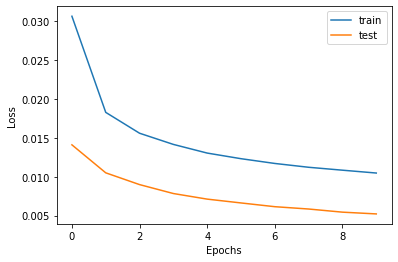

In [ ]:
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.show()

In [ ]:
pred_x1 = model_sgd_m.predict(X_test)
pred_x1.shape

(10000, 784)

Reshape images back to 28,28

In [ ]:
pred_x1 = pred_x1.reshape(10000,28,28)

(-0.5, 27.5, 27.5, -0.5)

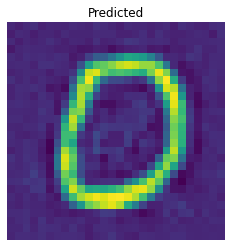

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(pred_x1[10])
plt.title('Predicted')
plt.grid(False)
plt.axis('off')

(-0.5, 27.5, 27.5, -0.5)

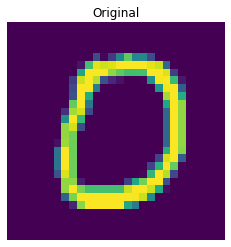

In [ ]:
plt.figure()
plt.imshow(X_test[10].reshape(28,28))
plt.title('Original')
plt.grid(False)
plt.axis('off')

### RMSprop

In [ ]:
 opt = tensorflow.keras.optimizers.RMSprop(learning_rate=0.1)

In [ ]:
model_rms = auto_encoder(opt)

In [ ]:
history = model_rms.fit(X_train, X_train, epochs=10, batch_size=16, verbose=2, validation_data=(X_test, X_test))

Epoch 1/10
3750/3750 - 76s - loss: 19.4561 - val_loss: 0.5175
Epoch 2/10
3750/3750 - 75s - loss: 18.9891 - val_loss: 0.8646
Epoch 3/10
3750/3750 - 75s - loss: 19.9707 - val_loss: 0.7608
Epoch 4/10
3750/3750 - 76s - loss: 19.2628 - val_loss: 3.1703
Epoch 5/10
3750/3750 - 75s - loss: 19.7897 - val_loss: 0.2383
Epoch 6/10
3750/3750 - 76s - loss: 19.0491 - val_loss: 0.2508
Epoch 7/10
3750/3750 - 75s - loss: 19.5824 - val_loss: 0.6835
Epoch 8/10
3750/3750 - 75s - loss: 18.7411 - val_loss: 0.2457
Epoch 9/10
3750/3750 - 75s - loss: 19.4392 - val_loss: 0.9895
Epoch 10/10
3750/3750 - 76s - loss: 20.2517 - val_loss: 0.1203


In [ ]:
import numpy as np
validation_loss = history.history['val_loss']
loss_= np.mean(np.array(validation_loss))
print("Average validation loss : ",loss_)

Average validation loss :  0.7841357000172138


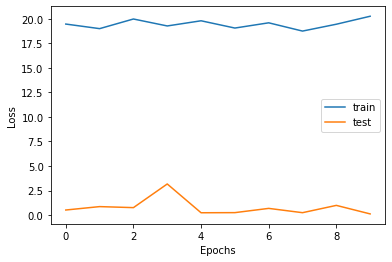

In [ ]:
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.show()

In [ ]:
pred_x1 = model_rms.predict(X_test)
pred_x1.shape

(10000, 784)

Reshape images back to 28,28

In [ ]:
pred_x1 = pred_x1.reshape(10000,28,28)

(-0.5, 27.5, 27.5, -0.5)

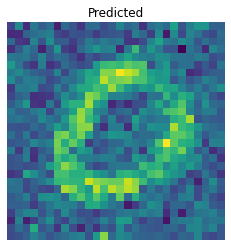

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(pred_x1[10])
plt.title('Predicted')
plt.grid(False)
plt.axis('off')

(-0.5, 27.5, 27.5, -0.5)

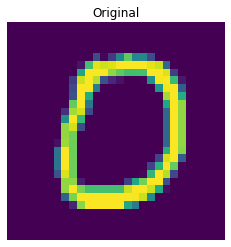

In [ ]:
plt.figure()
plt.imshow(X_test[10].reshape(28,28))
plt.title('Original')
plt.grid(False)
plt.axis('off')

### Best Model based on Least average Validation loss

SGD optimizer with momentum = 0.9 performed the best

In [ ]:
model_sgd_m.save('/content/drive/MyDrive/SMAI/assgn3/q2')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/SMAI/assgn3/q2/assets
